In [1]:
import pandas as pd
import os
from glob import glob
from reports import get_average_classification_report
pd.options.display.float_format = '{:.4f}'.format
from functools import reduce
pd.options.display.float_format = '{:.4f}'.format
import seaborn as sns

In [2]:
target_trained_with_nums = [400, 500, 600, 700, 800, 900, 1000, 2000]
dirnames = sorted(glob(os.path.join('C:\DATA\ComBERT', 'results_spamFiltering', 'CM_epochs', '*_seed2')))
dirnames

['C:\\DATA\\ComBERT\\results_spamFiltering\\CM_epochs\\Araci_CM_epoch3_seed2',
 'C:\\DATA\\ComBERT\\results_spamFiltering\\CM_epochs\\Araci_CM_epoch4_seed2',
 'C:\\DATA\\ComBERT\\results_spamFiltering\\CM_epochs\\Araci_CM_epoch5_seed2',
 'C:\\DATA\\ComBERT\\results_spamFiltering\\CM_epochs\\Araci_CM_epoch6_seed2',
 'C:\\DATA\\ComBERT\\results_spamFiltering\\CM_epochs\\Araci_CM_epoch7_seed2',
 'C:\\DATA\\ComBERT\\results_spamFiltering\\CM_epochs\\Araci_CM_epoch8_seed2',
 'C:\\DATA\\ComBERT\\results_spamFiltering\\CM_epochs\\Araci_CM_epoch9_seed2',
 'C:\\DATA\\ComBERT\\results_spamFiltering\\CM_epochs\\BERT_CM_epoch3_seed2',
 'C:\\DATA\\ComBERT\\results_spamFiltering\\CM_epochs\\BERT_CM_epoch4_seed2',
 'C:\\DATA\\ComBERT\\results_spamFiltering\\CM_epochs\\BERT_CM_epoch5_seed2',
 'C:\\DATA\\ComBERT\\results_spamFiltering\\CM_epochs\\BERT_CM_epoch6_seed2',
 'C:\\DATA\\ComBERT\\results_spamFiltering\\CM_epochs\\BERT_CM_epoch7_seed2',
 'C:\\DATA\\ComBERT\\results_spamFiltering\\CM_epochs\\BE

In [3]:
dfs = []
for dirname in dirnames:
    model_name, method_name, epoch_num, seed_num = os.path.basename(dirname).split('_')
    
    records = []
    for target_trained_with_num in target_trained_with_nums:
        filepaths = glob(os.path.join(os.path.dirname(dirname), '{}_*'.format('_'.join([model_name, method_name, epoch_num])), \
                  'classification_report_train_{}.csv'.format(target_trained_with_num)))
        
        column_name = '_'.join([model_name, method_name, epoch_num])
        averaged_classification_report_df = get_average_classification_report([pd.read_csv(filepath) for filepath in filepaths])
        acc = 100*averaged_classification_report_df.filter(items = ['accuracy'], axis=0)['f1-score'].values[0]
        records.append((target_trained_with_num, acc))
    dfs.append(pd.DataFrame(records, columns=['trained_with', column_name]).sort_values(by=['trained_with']))

result = reduce(lambda df1,df2: pd.merge(df1,df2,on='trained_with'), dfs)
result.set_index('trained_with', inplace=True)
result.loc['Average'] = result.mean()

result

,Araci_CM_epoch3,Araci_CM_epoch4,Araci_CM_epoch5,Araci_CM_epoch6,Araci_CM_epoch7,Araci_CM_epoch8,Araci_CM_epoch9,BERT_CM_epoch3,BERT_CM_epoch4,BERT_CM_epoch5,...,SECBERT_CM_epoch7,SECBERT_CM_epoch8,SECBERT_CM_epoch9,Yang_CM_epoch3,Yang_CM_epoch4,Yang_CM_epoch5,Yang_CM_epoch6,Yang_CM_epoch7,Yang_CM_epoch8,Yang_CM_epoch9
trained_with,,,,,,,,,,,,,,,,,,,,,
400,59.3600,76.9267,77.5400,75.9300,76.5033,78.8967,77.5200,60.1033,75.7867,79.0567,...,79.4567,79.6400,76.4767,66.3567,79.8933,76.8667,78.9467,77.4300,77.2367,78.3367
500,67.3667,78.8500,79.5133,79.0633,78.6133,78.5867,78.7733,64.4700,77.0867,78.7433,...,78.5500,79.7767,80.3033,70.6500,80.5633,79.2200,78.6933,78.3067,79.0633,79.8667
600,69.8733,76.9200,79.8833,79.8700,79.2433,79.3367,80.0367,68.2367,78.1833,79.4200,...,79.8800,80.0933,79.0567,72.2333,79.0967,80.1133,78.5100,79.2500,79.8333,79.1167
700,71.5367,78.5900,79.1933,79.3700,79.8367,79.2633,79.5700,69.8400,78.7000,78.9467,...,79.2867,80.1967,78.9100,75.0533,79.9133,80.2100,79.8767,78.1700,77.5433,80.0367
800,72.6033,78.5767,79.0033,79.6800,79.9433,79.1100,80.0733,67.9633,78.9600,78.4533,...,80.3433,79.7733,79.4067,76.5500,80.1667,78.9633,78.5000,79.2767,78.6733,79.8033
900,74.5300,79.8200,80.1700,78.8967,80.2333,79.6900,79.2933,73.0967,79.4067,78.1300,...,79.6833,80.4233,79.9733,77.9167,79.5167,80.8167,80.4933,79.9233,78.8300,79.8233
1000,75.9600,79.7933,79.9700,79.4033,79.8500,78.5033,79.7767,72.8667,79.8800,80.3233,...,80.3267,78.9033,79.9933,78.3767,79.3233,79.4833,79.7000,80.4967,80.1600,80.2300
2000,80.9300,81.7000,81.8967,80.9100,81.2633,81.0167,81.5000,80.4200,81.3333,81.5933,...,81.8500,81.9633,81.8300,80.9967,82.3067,81.8933,81.3633,81.6033,80.7500,81.8433
Average,71.5200,78.8971,79.6463,79.1404,79.4358,79.3004,79.5679,69.6246,78.6671,79.3333,...,79.9221,80.0962,79.4938,74.7667,80.0975,79.6958,79.5104,79.3071,79.0113,79.8821


Average of the four models

In [6]:
dfs = []
for epoch_num in sorted(set([item[-1] for item in result.columns])):
    colname = 'epoch{}'.format(epoch_num)
    dfs.append(pd.DataFrame(result[[item for item in result.columns if colname in item]].mean(axis=1), columns=[colname]))
average_result = reduce(lambda df1,df2: pd.merge(df1,df2,on='trained_with'), dfs)
average_result

,epoch3,epoch4,epoch5,epoch6,epoch7,epoch8,epoch9
trained_with,,,,,,,
400,60.4825,77.8858,78.5558,77.3800,77.7850,78.0175,77.6792
500,66.3325,79.2017,79.5175,78.5467,78.2725,79.0717,79.3167
600,69.4983,78.6783,79.9192,79.6050,79.2050,79.5850,79.5125
700,71.7433,79.4075,79.7158,79.6842,79.0017,78.5900,79.1567
800,71.7017,79.6000,78.8583,79.5017,79.8967,78.9183,79.4517
900,74.8000,79.7058,79.6125,79.6675,80.0700,79.6333,79.5742
1000,75.3158,79.7283,79.9017,79.3442,80.1117,79.3267,79.5825
2000,80.6233,81.7708,81.9025,81.3850,81.6267,81.3842,81.6333
Average,71.3122,79.4973,79.7479,79.3893,79.4961,79.3158,79.4883


<AxesSubplot:>

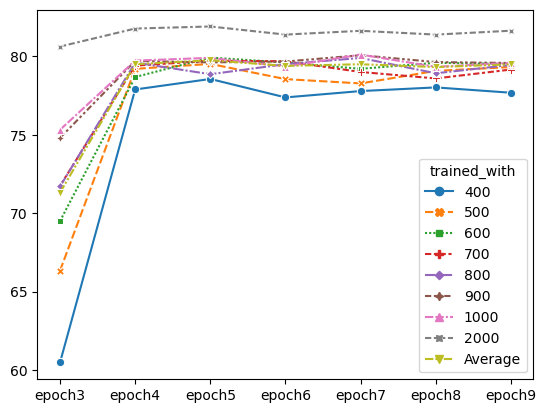

In [7]:
sns.lineplot(data=average_result.transpose(), markers=True)